                                                                                                                                                                                                      text                                                                   summary
0                   A South African court issued an interim order to prevent the Sudanese president from leaving the country after the International Criminal Court sought his arrest on genocide charges.  Bid by Omar al-Bashir of Sudan to Avoid Arrest Is Tested in South Africa
1                            Along with fish balls and flowers, vendors in Victoria Park sold a game with a predetermined set of outcomes, a nod to the Beijing-directed selection of the cityâs leader.             At Hong Kong New Year Fair, Defiance Gives Way to Resignation
2                                                                 The kidnappers of 11 European tourists and 8 Egyptians who were taken have demanded $6 million to free 

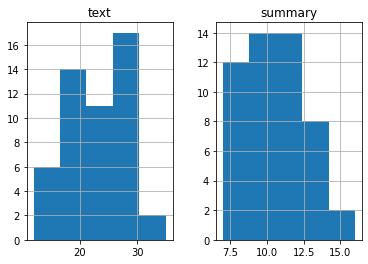

0.98
1.0
                                                                                                                                                                    text                                                                                   summary
0  along with fish balls and flowers vendors in victoria park sold game with predetermined set of outcomes nod to the beijing-directed selection of the cityâs leader.  sostok _START_ at hong kong new year fair defiance gives way to resignation _END_ eostok
1                                    the kidnappers of 11 european tourists and egyptians who were taken have demanded $6 million to free them government official said.               sostok _START_ talks under way to free europeans and egyptians _END_ eostok


In [ ]:
# -*- coding: utf-8 -*-
"""notebook29a2e360db (1).ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1U7sVxtiEAVa4KciT55bYKU9w_0lk-iJC
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

"""**Resources - **
1. https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/
2. https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/
3. https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70
4. https://github.com/aravindpai/How-to-build-own-text-summarizer-using-deep-learning
"""
data = pd.read_csv("/content/NYT_Dataset.csv")
#data = pd.read_csv('/content/example_data.csv', sep='|', encoding='iso-8859-1')
abs = data['abstract']
summ = data['title']


#summ =  data.iloc[:, 2].copy()
#abs = data.iloc[:, 4].copy()
#topic = data.iloc[:,3].copy()
#kw = data.iloc[:,6]

#summary = pd.read_csv('news_summary.csv', encoding='iso-8859-1')
#raw = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

#pre1 =  raw.iloc[0:10000,0:2].copy()
#pre1['head + text'] = pre1['headlines'].str.cat(pre1['text'], sep =" ")

#pre2 = summary.iloc[0:10000,0:6].copy()
#pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")

pre = pd.DataFrame()
#pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
#pre['summary'] = pd.concat([pre1['headlines'],pre2['headlines']],ignore_index = True)

pre['text'] =abs

pre['summary'] = summ
#pre['text'] = abs
print(pre.head(5))

"""**Seq2Seq LSTM Modelling**
![final.jpg](attachment:final.jpg)
"""

#LSTM with Attention
#pip install keras-self-attention

#pre['text'][:10]

"""> **Perform Data Cleansing**"""

import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row

brief_cleaning1 = text_strip(pre['text'])
brief_cleaning2 = text_strip(pre['summary'])

from time import time
import spacy

nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:


t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

text[0]

summary[0]

pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(summary)

text_count = []
summary_count = []

for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

#Check how much % of summary have 0-15 words
cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

#Check how much % of text have 0-70 words
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())<=100):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=100
max_summary_len=15

#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

post_pre.head(2)

#Add sostok and eostok at 
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

print(post_pre.head(2))

"""**SEQ2SEQ MODEL BUILDING **

Split the data to TRAIN and VALIDATION sets
"""

from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.09,random_state=0,shuffle=False)

In [ ]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

"""**RARE WORD ANALYSIS FOR X i.e 'text'**
* tot_cnt gives the size of vocabulary (which means every unique words in the text)

* cnt gives me the no. of rare words whose count falls below threshold

* tot_cnt - cnt gives me the top most common words
"""

thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

"""**RARE WORD ANALYSIS FOR Y i.e 'summary'**
* tot_cnt gives the size of vocabulary (which means every unique words in the text)

* cnt gives me the no. of rare words whose count falls below threshold

* tot_cnt - cnt gives me the top most common words
"""

#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

"""We will now remove "Summary" i.e Y (both train and val) which has only _START_ and _END_"""

ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

% of rare words in vocabulary: 95.08716323296355
Total Coverage of rare words: 67.20841300191205
Size of vocabulary in X = 32
% of rare words in vocabulary: 96.52777777777779
Total Coverage of rare words: 59.04936014625228
Size of vocabulary in Y = 11


Size of vocabulary from the w2v model = 19609
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 200)     3921800     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                

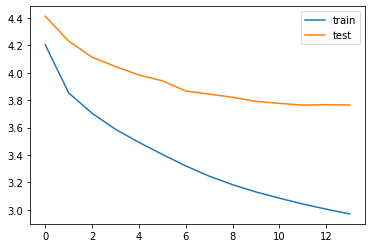

In [ ]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

"""**Start fitting the model with the data**"""

history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

"""**Visualize the model learning**"""

from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

"""**Next, let’s build the dictionary to convert the index to word for target and source vocabulary:**"""

reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

"""**We are defining a function below which is the implementation of the inference process**"""

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

"""**Let us define the functions to convert an integer sequence to a word sequence for summary as well as the reviews:**

"""

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
!mkdir -p saved_model
model.save('LSTM')

INFO:tensorflow:Assets written to: LSTM/assets


In [ ]:
for i in range(1,10000):
    print("abstract:",abs[i])
    print("Original title:",seq2summary(y_tr[i]))
    print("Predicted title:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Streaming output truncated to the last 5000 lines.

abstract: Hit hard by the financial crisis, the country slid further into political disarray on Friday when Parliament voted overwhelmingly to dismiss Yuri Yekhanurov.
Original title: start attacked pakistani villagers take on taliban end 
Predicted title:  start taliban attack in pakistan kills at least 10 end


abstract: The president's remarks after he visited the former concentration camp of Buchenwald with German Chancellor Angela Merkel and camp survivor Elie Wiesel. 
Original title: start accounts differ on afghan grenade attack end 
Predicted title:  start u s and pakistan clash over afghan forces end


abstract: The Obama administration has selected Israeli settlement building in occupied lands as the issue that could begin to untie the Gordian knot of the conflict.
Original title: start suspects plan guilty pleas in terror case in germany end 
Predicted title:  start britain arrests in plot to kill terrorism end


abstract: 

In [ ]:
!pip install rouge-score

In [ ]:
count = 0
review = []
original =[]
predicted=[]
for i in range(1,8000):
    review.append(abs[i])
    original.append(seq2summary(y_val[i]))
    count = count+1
    predicted.append(decode_sequence(x_val[i].reshape(1,max_text_len)))
    print(count)

Streaming output truncated to the last 5000 lines.
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189

In [ ]:
print(len(original))

7999


In [ ]:
origi = original
predy = predicted

In [ ]:
A1 = origi
A2 = predy

In [ ]:
print(len(origi))
print(len(predy))

7999
7999


In [ ]:
print(len(A1))
print(len(A2))

7999
7999


In [ ]:
print(original)

['start australia’s prime minister by state’s secret deal with china end ', 'start on politics behind florida recount furor g o p strategy end ', 'start u n ’s expert on is investigating britain why end ', 'start erdogan presses for answers from saudi prince in khashoggi killing end ', 'start a week after the election democratic gains grow stronger end ', 'start in prison for 16 years and still waiting for verdict end ', 'start britain and e u agree on draft deal for brexit end ', 'start after grief and defiance arts help process 2015 paris attacks end ', 'start papua new guinea is rich in resources but poor in health end ', 'start suspect who looks like from is arrested end ', 'start end ', 'start arizona election results key takeaways on victory end ', 'start sri lanka’s president finally court rules to bring back parliament end ', 'start new questions swirl over boeing on model that crashed end ', 'start merkel joins macron in calling for european army ‘one day’ end ', 'start u n ri

In [ ]:
from statistics import mean
f1_R1=[]
precision_R1 =[]
recall_R1 = []

f1_RL=[]
precision_RL =[]
recall_RL = []

from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
for (orig, pred) in zip(original, predicted):
  scores = scorer.score(str.lower(orig),str.lower(pred))
  precision_R1.append(scores['rouge1'][0])
  recall_R1.append(scores['rouge1'][1])
  f1_R1.append(scores['rouge1'][2])

  precision_RL.append(scores['rougeL'][0])
  recall_RL.append(scores['rougeL'][1])
  f1_RL.append(scores['rougeL'][2])

print('Rouge1: Precision', mean(precision_R1))
print('Rouge1: Recall', mean(recall_R1))
print('Rouge1: F1', mean(f1_R1))
print('*******************************************************')
print('*******************************************************')
print('RougeL: Precision', mean(precision_RL))
print('RougeL: Recall', mean(recall_RL))
print('RougeL: F1', mean(f1_RL))

Rouge1: Precision 0.38892195767195764
Rouge1: Recall 0.29998797498797497
Rouge1: F1 0.334947050006698
*******************************************************
*******************************************************
RougeL: Precision 0.3739733645983646
RougeL: Recall 0.2895227457727458
RougeL: F1 0.3227259780030173


In [ ]:
!pip install bert-score

     |████████████████████████████████| 60 kB 4.6 MB/s 
     |████████████████████████████████| 3.4 MB 17.4 MB/s 
     |████████████████████████████████| 596 kB 56.1 MB/s 
     |████████████████████████████████| 3.3 MB 52.7 MB/s 
     |████████████████████████████████| 895 kB 55.9 MB/s 
     |████████████████████████████████| 61 kB 547 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from bert_score import score

def calculate_bert_score(predicted_title,true_title):
    P, R, F1 = score(predicted_title, true_title, lang='en')
    f1_score = F1.mean()
    R_score = R.mean()
    P_score = P.mean()
    print(f"System level Precision score: {P.mean():.3f}")
    print(f"System level Recall score: {R.mean():.3f}")
    print(f"System level F1 score: {F1.mean():.3f}")

In [ ]:
calculate_bert_score(origi,predy)

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


System level Precision score: 0.841
System level Recall score: 0.847
System level F1 score: 0.844


In [ ]:
!pip install --upgrade pip
!git clone https://github.com/google-research/bleurt.git
%cd bleurt
!pip install .

     |████████████████████████████████| 1.7 MB 7.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Cloning into 'bleurt'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 116 (delta 32), reused 55 (delta 20), pack-reused 40
Receiving objects: 100% (116/116), 31.27 MiB | 8.44 MiB/s, done.
Resolving deltas: 100% (36/36), done.
/content/bleurt
Processing /content/bleurt
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 352 kB 8.4 MB/s            
     |████████████████████████████████| 1.2 MB 57.8 MB/s            
  Created wheel for BLEURT: filename=BLEURT-0.0.2-py3-none-any.whl size=16456763 sha256=6a7f0a0feec1abe545b471b02e7d43f410447d45d03d7a868516fc321055e6f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-i3rbu8rr/wheels/15/d1/f6/2ef9b6f78af64ad606636

In [ ]:
!python -m unittest bleurt.score_test
!python -m unittest bleurt.score_not_eager_test
!python -m unittest bleurt.finetune_test
!python -m unittest bleurt.score_files_test

2021-12-15 19:05:54.928774: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
.....s..
----------------------------------------------------------------------
Ran 8 tests in 10.391s

OK (skipped=1)
2021-12-15 19:06:13.946044: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
.s.
----------------------------------------------------------------------
Ran 3 tests in 4.938s

OK (skipped=1)
INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps 1000 or save_checkpoint

In [ ]:
%cd /content/bleurt

/content/bleurt


In [ ]:
from statistics import mean
from bleurt import score

similarity = 0
count = 0

checkpoint = "bleurt/test_checkpoint"
scorer = score.BleurtScorer(checkpoint)
for (orig, predy) in zip(A1, A2):
  origi =[]
  predyc = []
  origi.append(orig)
  predyc.append(predy)
  scores = scorer.score(references=origi, candidates=predyc)
  assert type(scores) == list and len(scores) == 1
  count = count + 1
  similarity = similarity + scores[0]

print(similarity/count)

INFO:tensorflow:Reading checkpoint bleurt/test_checkpoint.


INFO:tensorflow:Reading checkpoint bleurt/test_checkpoint.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Will load checkpoint dbleurt_tiny


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... name:dbleurt_tiny


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:... max_seq_length:512


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


-1.0052235047676992


In [ ]:
for i in range(0,43):
    print("abstract:",abs[i])
    print("Original title:",seq2summary(y_tr[i]))
    print("Predicted title:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

abstract: A South African court issued an interim order to prevent the Sudanese president from leaving the country after the International Criminal Court sought his arrest on genocide charges.
Original title: end start on 
Predicted title:  start the world this week end


abstract: Along with fish balls and flowers, vendors in Victoria Park sold a game with a predetermined set of outcomes, a nod to the Beijing-directed selection of the cityâs leader.
Original title: end start on of 
Predicted title:  start end


abstract: The kidnappers of 11 European tourists and 8 Egyptians who were taken have demanded $6 million to free them, a government official said.
Original title: end start 
Predicted title:  start the world this week end


abstract: Martha OâDonovan was charged with undermining the authority of then-President Robert Mugabe after critical posts appeared on an anonymous Twitter account.
Original title: end start the 
Predicted title:  start the president of the union end


a